# Model Exploration
This notebook is used to compare and tune various models.

## Dependencies

In [1]:
# Data Management/Investigation
import pandas as pd
import numpy as np
import missingno as miss
from plotnine import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# For pre-processing data 
from sklearn import preprocessing as pp 
from sklearn.compose import ColumnTransformer 

# For splits and CV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # Cross validation 
from sklearn.model_selection import cross_validate # Cross validation 
from sklearn.model_selection import GridSearchCV # Cross validation + param. tuning.

# Machine learning methods 
from sklearn.linear_model import LinearRegression as LM
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor as DTree
from sklearn import tree # For plotting the decision tree rules
from sklearn.ensemble import BaggingRegressor as Bag
from sklearn.ensemble import RandomForestRegressor as RF

# For evaluating our model's performance
import sklearn.metrics as m

# Pipeline to combine modeling elements
from sklearn.pipeline import Pipeline

## Data

In [2]:
dta = pd.read_csv('data/clean_data.csv')
dta = dta.fillna(0)
dta.shape

(686, 78)

In [3]:
# Available predictors
list(dta)

['Participant_ID',
 'Category',
 'Age_yrs',
 'Age_category',
 'Education_yrs',
 'Education_category',
 'Sex',
 'Marital_status',
 'Income',
 'Occupation_class',
 'Living_area',
 'BP_sistol',
 'BP_diastol',
 'BMI',
 'GDS',
 'Glucose',
 'Triglyceride',
 'HDL',
 'Hypertension',
 'BMI_category',
 'Diabetes',
 'Tri_200',
 'HDL_40',
 'Smoking_status',
 'Stroke',
 'Depression',
 'INA_AD8',
 'ADL',
 'AMT',
 'Intellectual_1',
 'Intellectual_2',
 'Intellectual_3',
 'Intellectual_4',
 'Intellectual_5',
 'Intellectual_6',
 'Intellectual_7',
 'Intellectual_8',
 'Social_1',
 'Social_2',
 'Social_3',
 'Social_4',
 'Social_5',
 'Social_6',
 'Social_7',
 'Social_8',
 'Social_9',
 'Recreational_1',
 'Recreational_2',
 'Recreational_3',
 'Recreational_4',
 'Recreational_5',
 'Recreational_6',
 'Recreational_7',
 'Recreational_8',
 'Physical_1',
 'Physical_2',
 'Physical_3',
 'Physical_4',
 'Physical_5',
 'Intellectually_active',
 'Socially_active',
 'Recreationally_active',
 'Physically_active',
 'Total_

In [4]:
dta_copy = dta.copy()
intell = []
for row in dta_copy['Intellectually_active']:
    if row == 'active': intell.append(1)
    else: intell.append(0)
dta_copy['Active_intellectually'] = intell

In [5]:
social = []
for row in dta_copy['Socially_active']:
    if row == 'active': social.append(1)
    else: social.append(0)
dta_copy['Active_socially'] = social

In [6]:
recrea = []
for row in dta_copy['Recreationally_active']:
    if row == 'active': recrea.append(1)
    else: recrea.append(0)
dta_copy['Active_recreationally'] = recrea

In [7]:
physi = []
for row in dta_copy['Physically_active']:
    if row == 'active': physi.append(1)
    else: physi.append(0)
dta_copy['Active_physically'] = physi

In [8]:
total = []
for row in dta_copy['Total_active']:
    if row == 'active': total.append(1)
    else: total.append(0)
dta_copy['Active_total'] = total

In [9]:
dta_copy.head(10)

,Participant_ID,Category,Age_yrs,Age_category,Education_yrs,Education_category,Sex,Marital_status,Income,Occupation_class,...,Salted_fish_category,Instant_noodle,Instant_noodle_category,Tempe,Tempe_category,Active_intellectually,Active_socially,Active_recreationally,Active_physically,Active_total
0,80001,Dementia,70.0,60-74,3.0,0-6 years,Female,Married,No Income,housewife,...,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent,0,1,1,0,1
1,80002,Normal,63.0,60-74,0.0,0-6 years,Female,Single,< monthly minimum wage,profesional,...,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent,1,1,1,1,1
2,80003,Normal,64.0,60-74,6.0,0-6 years,Female,Married,No Income,housewife,...,Non-Frequent,0,0,0,0,0,1,1,1,0
3,80004,Normal,62.0,60-74,6.0,0-6 years,Female,Married,≥ monthly minimum wage,housewife,...,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent,0,1,1,0,0
4,80005,Dementia,78.0,>75,3.0,0-6 years,Female,Married,No Income,housewife,...,Non-Frequent,Sometimes,Non-Frequent,Sometimes,Non-Frequent,0,1,0,0,1
5,80006,Dementia,78.0,>75,0.0,0-6 years,Female,Married,No Income,housewife,...,Frequent,Every Meal,Frequent,Few times/week,Non-Frequent,0,0,1,1,1
6,80007,Normal,75.0,>75,6.0,0-6 years,Female,Single,No Income,housewife,...,Non-Frequent,Sometimes,Non-Frequent,Few times/week,Non-Frequent,0,0,1,1,1
7,80009,Normal,64.0,60-74,4.0,0-6 years,Female,Married,No Income,housewife,...,Non-Frequent,0,0,0,0,0,1,0,0,0
8,80010,Dementia,66.0,60-74,2.0,0-6 years,Female,Single,No Income,notworking,...,Non-Frequent,0,0,0,0,1,1,1,0,0
9,80011,Dementia,73.0,60-74,0.0,0-6 years,Female,Single,No Income,housewife,...,Non-Frequent,Few times/week,Frequent,Few times/week,Non-Frequent,0,0,1,0,1


In [11]:
mar_dummies = pd.get_dummies(dta_copy.Marital_status)
dta_copy = pd.concat([dta_copy.drop(['Marital_status'],axis=1),mar_dummies],axis=1)
dta_copy.head()

,Participant_ID,Category,Age_yrs,Age_category,Education_yrs,Education_category,Sex,Income,Occupation_class,Living_area,...,Tempe,Tempe_category,Active_intellectually,Active_socially,Active_recreationally,Active_physically,Active_total,0,Married,Single
0,80001,Dementia,70.0,60-74,3.0,0-6 years,Female,No Income,housewife,Rural,...,Few times/week,Non-Frequent,0,1,1,0,1,0,1,0
1,80002,Normal,63.0,60-74,0.0,0-6 years,Female,< monthly minimum wage,profesional,Rural,...,Few times/week,Non-Frequent,1,1,1,1,1,0,0,1
2,80003,Normal,64.0,60-74,6.0,0-6 years,Female,No Income,housewife,Rural,...,0,0,0,1,1,1,0,0,1,0
3,80004,Normal,62.0,60-74,6.0,0-6 years,Female,≥ monthly minimum wage,housewife,Rural,...,Few times/week,Non-Frequent,0,1,1,0,0,0,1,0
4,80005,Dementia,78.0,>75,3.0,0-6 years,Female,No Income,housewife,Rural,...,Sometimes,Non-Frequent,0,1,0,0,1,0,1,0


In [18]:
sex_dummies = pd.get_dummies(dta_copy.Sex)
dta_copy = pd.concat([dta_copy.drop(['Sex'],axis=1),sex_dummies],axis=1)
dta_copy.head()

,Participant_ID,Category,Age_yrs,Age_category,Education_yrs,Education_category,Income,Occupation_class,Living_area,BP_sistol,...,Active_intellectually,Active_socially,Active_recreationally,Active_physically,Active_total,0,Married,Single,Female,Male
0,80001,Dementia,70.0,60-74,3.0,0-6 years,No Income,housewife,Rural,150.0,...,0,1,1,0,1,0,1,0,1,0
1,80002,Normal,63.0,60-74,0.0,0-6 years,< monthly minimum wage,profesional,Rural,140.0,...,1,1,1,1,1,0,0,1,1,0
2,80003,Normal,64.0,60-74,6.0,0-6 years,No Income,housewife,Rural,150.0,...,0,1,1,1,0,0,1,0,1,0
3,80004,Normal,62.0,60-74,6.0,0-6 years,≥ monthly minimum wage,housewife,Rural,120.0,...,0,1,1,0,0,0,1,0,1,0
4,80005,Dementia,78.0,>75,3.0,0-6 years,No Income,housewife,Rural,210.0,...,0,1,0,0,1,0,1,0,1,0


In [12]:
# Breakdown of categories - dementia vs. no dementia
dta_copy.Category.value_counts()

Normal      486
Dementia    200
Name: Category, dtype: int64

In [34]:
sample = dta_copy.groupby("Category").sample(n=200, random_state=1234)

In [35]:
sample.Category.value_counts()

Dementia    200
Normal      200
Name: Category, dtype: int64

In [36]:
# Split data

# OUTCOME: whether or not someone has dementia (category)
y = sample['Category']
# PREDICTORS:
X = sample[['Age_yrs',
 'Education_yrs',
 'Married', 
 'BP_sistol',
 'BP_diastol',
 'BMI',
 'GDS',
 'Glucose',
 'Triglyceride',
 'HDL',
 'INA_AD8',
 'ADL',
 'AMT', 
 'Active_intellectually',
 'Active_socially',
 'Active_recreationally',
 'Active_physically',
 'Active_total']] 

In [37]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.25,random_state=1234)
# Look at the training data
train_X.shape 

(300, 18)

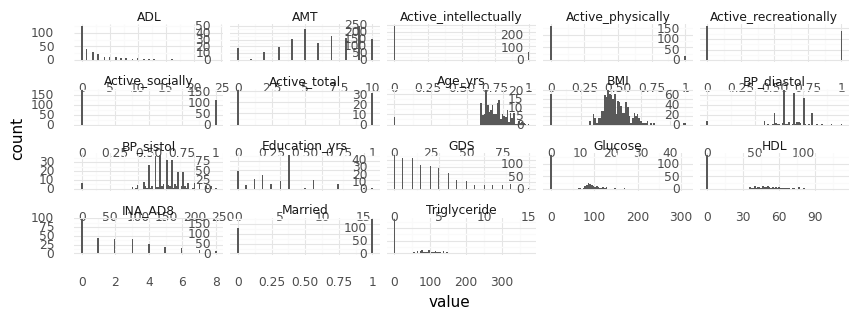

<ggplot: (8770106463229)>

In [38]:
(
    ggplot(train_X.melt(),aes(x="value")) +
    geom_histogram() +
    facet_wrap("variable",scales="free") +
    theme_minimal() +
    theme(figure_size = (10,3)) 
) 

In [46]:
# Let's rescale our training data
scaler = pp.MinMaxScaler()
col_names = list(train_X)
train_X = scaler.fit_transform(train_X)

In [47]:
# Convert back into data frame
train_X = pd.DataFrame(train_X,columns=col_names)
train_X

,Age_yrs,Education_yrs,Married,BP_sistol,BP_diastol,BMI,GDS,Glucose,Triglyceride,HDL,INA_AD8,ADL,AMT,Active_intellectually,Active_socially,Active_recreationally,Active_physically,Active_total
0,0.752688,0.2500,1.0,0.504202,0.571429,0.564714,0.000000,0.258900,0.203209,0.589286,0.375,0.041667,0.5,0.0,1.0,0.0,0.0,0.0
1,0.666667,0.5000,1.0,0.798319,0.785714,0.583872,0.133333,0.346278,0.366310,0.723214,0.000,0.000000,0.9,0.0,0.0,1.0,0.0,1.0
2,0.645161,0.2500,1.0,0.588235,0.571429,0.535086,0.066667,0.000000,0.000000,0.000000,0.000,0.000000,0.8,0.0,1.0,0.0,0.0,0.0
3,0.827957,0.3750,1.0,0.462185,0.428571,0.393852,0.400000,0.000000,0.000000,0.000000,0.750,0.291667,0.5,0.0,1.0,1.0,1.0,0.0
4,0.655914,0.3125,1.0,0.588235,0.642857,0.365337,0.133333,0.000000,0.000000,0.000000,0.000,0.000000,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.741935,0.3750,1.0,0.630252,0.642857,0.558922,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,1.0,1.0,1.0,0.0,1.0
296,0.795699,0.3750,1.0,0.470588,0.557143,0.458900,0.133333,0.000000,0.000000,0.000000,0.125,0.000000,0.5,0.0,0.0,0.0,0.0,0.0
297,0.666667,0.7500,1.0,0.588235,0.571429,0.449321,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,1.0,1.0,0.0,0.0,1.0,0.0
298,0.677419,0.1875,1.0,0.966387,0.928571,0.488750,0.200000,0.000000,0.000000,0.000000,0.000,0.000000,0.7,0.0,1.0,0.0,0.0,0.0


In [48]:
fold_generator = KFold(n_splits=5, shuffle=True,random_state=111)

In [49]:
use_metrics = ["neg_mean_squared_error"]

In [50]:
lm_scores = cross_validate(LM(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
knn_scores = cross_validate(KNN(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
dt_scores = cross_validate(DTree(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
bag_scores = cross_validate(Bag(),train_X,train_y, cv = fold_generator, scoring =use_metrics)
rf_scores = cross_validate(RF(),train_X,train_y, cv = fold_generator, scoring =use_metrics)

In [51]:
# Output is a dictionary 
lm_scores

{'fit_time': array([0.00190902, 0.00191283, 0.00169587, 0.00167513, 0.00172091]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_neg_mean_squared_error': array([nan, nan, nan, nan, nan])}

In [44]:
# Collect all the metrics we care about as a dictionary 
collect_scores = \
dict(lm = lm_scores['test_neg_mean_squared_error']*-1,
     knn = knn_scores['test_neg_mean_squared_error']*-1,
     dt = dt_scores['test_neg_mean_squared_error']*-1,
     bag = bag_scores['test_neg_mean_squared_error']*-1,
     rf = rf_scores['test_neg_mean_squared_error']*-1)

# Convert to a data frame and reshape
collect_scores = pd.DataFrame(collect_scores).melt(var_name="Model",value_name="MSE")
collect_scores

,Model,MSE
0,lm,NaN
1,lm,NaN
2,lm,NaN
3,lm,NaN
4,lm,NaN
5,knn,NaN
6,knn,NaN
7,knn,NaN
8,knn,NaN
9,knn,NaN
